## * 메이저 커피 프랜차이즈 데이터를 이용한 입지 분석!
###  ㄴ 메가커피 http://www.megacoffee.me

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from plotnine import *
import plotnine

# 그래프 폰트
import matplotlib.font_manager as fm
fontpath = 'C:/Windows/Fonts/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

#지도 시각화
import folium

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# 결측치
import missingno as msno

# 위도, 경도
import geopy
from geopy.geocoders import Nominatim

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

In [2]:
url = 'http://www.megacoffee.me/bbs/board.php?bo_table=store&page='

In [3]:
dir_user = 'D:/Python/project/PandasProject/'

In [4]:
df = pd.DataFrame()

In [5]:
for page in range(1, 204):
    page_url = '{}{}'.format(url, page)
    # print(page_url) # 변수 꼭 찍어보고 진행!
    df = df.append(pd.read_html(page_url, header=0)[7])

In [6]:
df

,지역,매장명,주소,전화번호,자세히보기
0,서울,홍대점,서울특별시 마포구 잔다리로6길 39(서교동),02-323-0656,VIEW
1,경기,안양1번가점,경기도 안양시 만안구 안양로304번길 13(안양동),NaN,VIEW
2,경기,성복역점,경기도 용인시 수지구 수지로 125(성복동),NaN,VIEW
3,대구,대구동성로점,대구광역시 중구 중앙대로 395(동성로3가),NaN,VIEW
4,서울,강남역점,서울특별시 강남구 테헤란로 101 강남역 지하쇼핑센터 e-35호(역삼동),NaN,VIEW
...,...,...,...,...,...
3,서울,하월곡동점,"서울특별시 성북구 오패산로3길 3, 1층(하월곡동, 홍진빌딩)",NaN,VIEW
4,서울,항동지식산업센터점,"서울특별시 구로구 부광로 88, 항동 공공주택지구내 업무2BL 구로SK V1 cen...",NaN,VIEW
5,부산,온천천점,"부산광역시 동래구 안남로 108, 1층 103호(안락동, 화성코아)",NaN,VIEW
6,서울,강남중앙점,"서울특별시 서초구 서초대로77길 35, 1층 102호(서초동)",NaN,VIEW


In [7]:
df1 = pd.DataFrame(df, columns=['지역', '매장명', '주소'])

In [8]:
df1.head()

,지역,매장명,주소
0,서울,홍대점,서울특별시 마포구 잔다리로6길 39(서교동)
1,경기,안양1번가점,경기도 안양시 만안구 안양로304번길 13(안양동)
2,경기,성복역점,경기도 용인시 수지구 수지로 125(성복동)
3,대구,대구동성로점,대구광역시 중구 중앙대로 395(동성로3가)
4,서울,강남역점,서울특별시 강남구 테헤란로 101 강남역 지하쇼핑센터 e-35호(역삼동)


In [9]:
# 대상 사이트의 부하를 줄이기 위해 크롤링 후 파일로 저장함.
df1.to_csv(dir_user + 'mgc.csv', index = False)

## * 일반적인 주소로 위경도 추가하기!

In [10]:
# csv 파일 불러오기
csv = pd.read_csv(dir_user + 'mgc.csv')
csv.head()

,지역,매장명,주소
0,서울,홍대점,서울특별시 마포구 잔다리로6길 39(서교동)
1,경기,안양1번가점,경기도 안양시 만안구 안양로304번길 13(안양동)
2,경기,성복역점,경기도 용인시 수지구 수지로 125(성복동)
3,대구,대구동성로점,대구광역시 중구 중앙대로 395(동성로3가)
4,서울,강남역점,서울특별시 강남구 테헤란로 101 강남역 지하쇼핑센터 e-35호(역삼동)


In [11]:
# 데이터프레임 주소값 추출
address = csv['주소']
address.head()

0                    서울특별시 마포구 잔다리로6길 39(서교동)
1                경기도 안양시 만안구 안양로304번길 13(안양동)
2                    경기도 용인시 수지구 수지로 125(성복동)
3                    대구광역시 중구 중앙대로 395(동성로3가)
4    서울특별시 강남구 테헤란로 101 강남역 지하쇼핑센터 e-35호(역삼동)
Name: 주소, dtype: object

In [12]:
# 주소 데이터 깔끔하게 다듬기
for i in range(len(address)):
    a = address[i].split(' ')
    address[i] = " ".join(a[0:4])
print(address)

0       서울특별시 마포구 잔다리로6길 39(서교동)
1           경기도 안양시 만안구 안양로304번길
2                경기도 용인시 수지구 수지로
3       대구광역시 중구 중앙대로 395(동성로3가)
4             서울특별시 강남구 테헤란로 101
                  ...           
1619         서울특별시 성북구 오패산로3길 3,
1620           서울특별시 구로구 부광로 88,
1621          부산광역시 동래구 안남로 108,
1622       서울특별시 서초구 서초대로77길 35,
1623      경기도 광주시 경충대로1422번길 10,
Name: 주소, Length: 1624, dtype: object


In [13]:
geo_local = Nominatim(user_agent='South Korea')

In [14]:
# 위도, 경도 반환하는 함수
# geopy 위도, 경도 반환시 결측치 많음(수동으로 작업하는게 좋을꺼 같음!)

def eval_results(x):
    try:
        return (x.latitude, x.longitude)
    except:
        return (None, None)

geo_df = address.apply(geo_local.geocode, timeout=1000000).apply(lambda x: eval_results(x))

In [15]:
df_series = pd.Series(geo_df)

In [16]:
latitude = []
longitude = []

for i in range(0, len(geo_df)):
    latitude.append(df_series[i][0])
    longitude.append(df_series[i][1])

In [17]:
# Dataframe 만들기
address_geo = pd.DataFrame({'지역': csv['지역'],'매장명': csv['매장명'],'주소' : address, '위도' : latitude, '경도' : longitude})

In [18]:
address_geo

,지역,매장명,주소,위도,경도
0,서울,홍대점,서울특별시 마포구 잔다리로6길 39(서교동),NaN,NaN
1,경기,안양1번가점,경기도 안양시 만안구 안양로304번길,37.399551,126.921678
2,경기,성복역점,경기도 용인시 수지구 수지로,37.307948,127.075511
3,대구,대구동성로점,대구광역시 중구 중앙대로 395(동성로3가),NaN,NaN
4,서울,강남역점,서울특별시 강남구 테헤란로 101,37.508264,127.060700
...,...,...,...,...,...
1619,서울,하월곡동점,"서울특별시 성북구 오패산로3길 3,",37.606801,127.034428
1620,서울,항동지식산업센터점,"서울특별시 구로구 부광로 88,",37.477189,126.816824
1621,부산,온천천점,"부산광역시 동래구 안남로 108,",35.193990,129.099438
1622,서울,강남중앙점,"서울특별시 서초구 서초대로77길 35,",37.500814,127.025270


In [19]:
# Dataframe 저장 
address_geo.to_csv(dir_user + 'mgc_geo.csv', index = False)

In [20]:
%ls

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 5C8B-5D16

 D:\Python\project\PandasProject 디렉터리

2022-01-04  오후 08:33    <DIR>          .
2022-01-04  오후 08:33    <DIR>          ..
2022-01-04  오후 08:12    <DIR>          .ipynb_checkpoints
2022-01-04  오후 08:32            22,773 Mega_Coffee_Data_Analysis.ipynb
2022-01-04  오후 08:18           144,752 mgc.csv
2022-01-04  오후 08:33           142,670 mgc_geo.csv
2022-01-04  오후 08:11                48 README.md
               4개 파일             310,243 바이트
               3개 디렉터리  435,146,600,448 바이트 남음


In [21]:
df_mgc = pd.read_csv(dir_user + 'mgc_geo.csv')

In [22]:
df_mgc

,지역,매장명,주소,위도,경도
0,서울,홍대점,서울특별시 마포구 잔다리로6길 39(서교동),NaN,NaN
1,경기,안양1번가점,경기도 안양시 만안구 안양로304번길,37.399551,126.921678
2,경기,성복역점,경기도 용인시 수지구 수지로,37.307948,127.075511
3,대구,대구동성로점,대구광역시 중구 중앙대로 395(동성로3가),NaN,NaN
4,서울,강남역점,서울특별시 강남구 테헤란로 101,37.508264,127.060700
...,...,...,...,...,...
1619,서울,하월곡동점,"서울특별시 성북구 오패산로3길 3,",37.606801,127.034428
1620,서울,항동지식산업센터점,"서울특별시 구로구 부광로 88,",37.477189,126.816824
1621,부산,온천천점,"부산광역시 동래구 안남로 108,",35.193990,129.099438
1622,서울,강남중앙점,"서울특별시 서초구 서초대로77길 35,",37.500814,127.025270


### * 데이터의 결측치 확인합니다.

<AxesSubplot:>

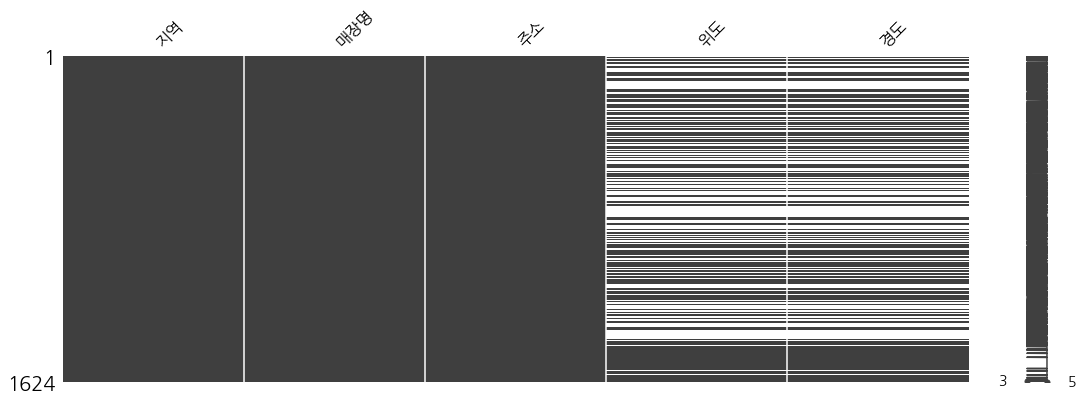

In [23]:
msno.matrix(df_mgc, figsize=(18,6))

In [24]:
df_mgc.isnull().sum()

지역       0
매장명      0
주소       0
위도     767
경도     767
dtype: int64

### * 경도와 위도가 있습니다. 데이터를 그려봅니다.

<AxesSubplot:xlabel='경도', ylabel='위도'>

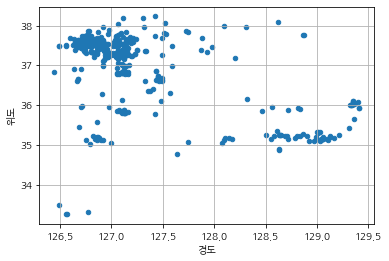

In [25]:
df_mgc[:1000].plot.scatter(x="경도", y="위도", grid="True")

C:\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 767 rows containing missing values.


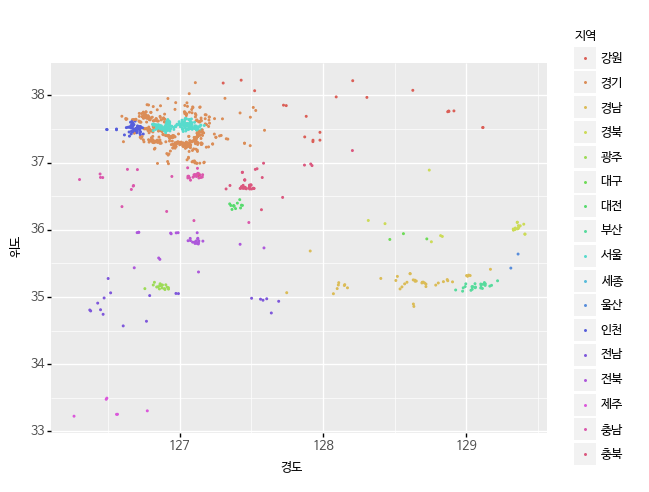

<ggplot: (132135339292)>

In [26]:
(ggplot(df_mgc)
 + aes(x='경도', y='위도', color='지역')
 + geom_point(size=0.2)
 + theme(text=element_text(fontproperties=font))
)

### * 메가커피 전국 매장 입지 분석!

In [27]:
geo_df = df_mgc.loc[(df_mgc['위도'].notnull()) & (df_mgc['경도'].notnull())]
geo_df.isnull().sum()

지역     0
매장명    0
주소     0
위도     0
경도     0
dtype: int64

In [28]:
geo_df.shape

(857, 5)

In [29]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=9)

for n in geo_df.index:
    store_name = geo_df['매장명'][n] + ' - ' + geo_df['주소'][n]
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], popup=store_name).add_to(map)
map